## Observations and Insights 

In [1]:
#Observations and Insights
#1. While Capomulin appears to have significant improvement in the short run, over time the tumors tend to gradually
#   grow back
#2. There is a strong correlation between the weight of the subject mice and the measured tumor volume in the Capomulin  drug regimen
#3. Capomulin has the most consistent measurements of the four most promising drugs. (Smallest IQR and no outliers)

In [2]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousedata_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mousedata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mousedata_df["Mouse ID"].value_counts()
#mousedata_df["Mouse ID"].unique()
len(mousedata_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mousedata_df["Timepoint"].value_counts()
mousedata_df[mousedata_df.duplicated()]
#mousedata_df.dtypes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
DupeData_df = mousedata_df[mousedata_df.duplicated()]
DupeData_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mousedata_df = mousedata_df.drop_duplicates()
len(mousedata_df["Mouse ID"].unique())

249

In [7]:
#Remove dupes
DupId = mousedata_df[mousedata_df.duplicated(subset = ["Mouse ID","Timepoint"])]

In [8]:
#Remove dupes
Dup1ID = mousedata_df.loc[mousedata_df["Mouse ID"] == "g989"]

In [9]:
#Remove dupes
Clean_df = mousedata_df.loc[mousedata_df["Mouse ID"] != "g989"]
len(Clean_df["Mouse ID"].unique())
Clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
#mousedata_df["Timepoint"].value_counts()
Clean_df["Mouse ID"].value_counts()

a251    10
k894    10
t451    10
k403    10
i334    10
        ..
o848     1
v199     1
x336     1
l872     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#mousedata_df["Drug Regimen"].value_counts()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
DrugG_df = Clean_df.groupby(['Drug Regimen'])
Count = DrugG_df["Mouse ID"].nunique()
Mean = DrugG_df["Tumor Volume (mm3)"].mean()
Median = DrugG_df["Tumor Volume (mm3)"].median()
Variance = DrugG_df["Tumor Volume (mm3)"].var()
StdDev = DrugG_df["Tumor Volume (mm3)"].std()
SEM = DrugG_df["Tumor Volume (mm3)"].sem()
Sumdf = pd.DataFrame ({
                'Number of mice':Count,
                'Mean Tumor Volume':Mean,
                'Median Tumor Volume':Median,
                'Variance':Variance,
                'Std Deviation':StdDev,
                'Std Error':SEM
})
Sumdf

,Number of mice,Mean Tumor Volume,Median Tumor Volume,Variance,Std Deviation,Std Error
Drug Regimen,,,,,,
Capomulin,25,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,25,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,25,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,25,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,25,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,25,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,24,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,25,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,24,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Use one line - aggregate
md2_df = Clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":['mean','median','std','var','sem']})
# This method produces everything in a single groupby function
md2_df

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

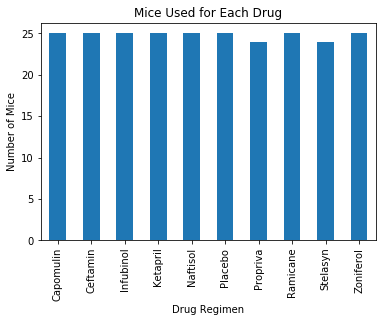

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#numb = DrugG_df["Mouse ID"].nunique()

# Count how many times each unique ID appears in our group
count_mice = DrugG_df['Mouse ID'].nunique()
count_mice

# Create a bar chart based off of the group series from before
count_chart = count_mice.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_title("Mice Used for Each Drug")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice")

#count_chart

Text(0.5, 0, 'Drug Regimen')

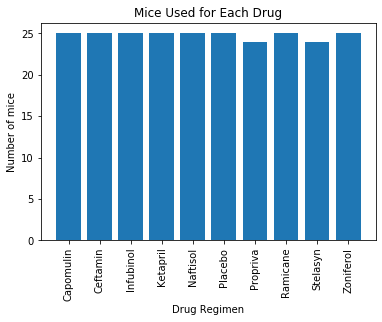

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
numbm = [25, 25, 25, 25, 25, 25, 24, 25, 24, 25]
plt.bar(drug, numbm)
plt.xticks(drug, rotation='vertical')
plt.title("Mice Used for Each Drug")
plt.ylabel("Number of mice")
plt.xlabel("Drug Regimen")

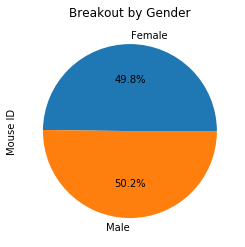

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = mousedata_df.groupby(["Sex"])
#Gcount = gender_df["Mouse ID"].nunique()

# Count how many times each unique ID appears in our group
count_gender = gender_df['Mouse ID'].nunique()
#count_gender

# Create a pie chart based off of the group series from before
gender_pie = count_gender.plot(kind="pie", y=count_gender, title="Breakout by Gender", autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x20dc84e8ac8>,
 [Text(0.006939175976765795, 1.0999781124353174, 'Female'),
  Text(-0.006939175976765929, -1.0999781124353174, 'Male')],
 [Text(0.0037850050782358875, 0.5999880613283548, '49.8%'),
  Text(-0.003785005078235961, -0.5999880613283548, '50.2%')])

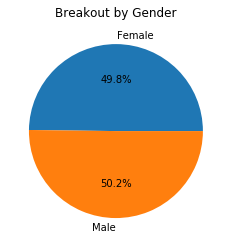

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Female", "Male"]
gcounts = [124, 125]

plt.title("Breakout by Gender")
plt.pie(gcounts, labels=genders, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Clean_df
# Start by getting the last (greatest) timepoint for each mouse
#sorted_df = Clean_df.loc[(Clean_df["Drug Regimen"] == "Capomulin") | (Clean_df["Drug Regimen"] == "Ramicane") | (Clean_df["Drug Regimen"] == "Infubinol") | (Clean_df["Drug Regimen"] == "Ceftamin")]
#sorted1_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#sorted1_df.head()
max_tumor = Clean_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

In [18]:
merged_data = max_tumor.merge(Clean_df,on=['Mouse ID','Timepoint'],how="left")
merged_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
Dlist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tlist = []

#Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volume
for drug in Dlist:
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"For {drug}, the lower quartile of tumor volume is: {lowerq}")
    print(f"For {drug}, the upper quartile of tumor volume is: {upperq}")
    print(f"For {drug}, the interquartile range of tumor volume is: {iqr}")
    print(f"For {drug}, the the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {drug}, values below {lower_bound} could be outliers.")
    print(f"For {drug}, values above {upper_bound} could be outliers.")
    # Determine outliers using upper and lower bounds   
    Outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(Outliers)
    # add subset (Random samples)
    Tlist.append(final_tumor_vol)


For Capomulin, the lower quartile of tumor volume is: 32.37735684
For Capomulin, the upper quartile of tumor volume is: 40.1592203
For Capomulin, the interquartile range of tumor volume is: 7.781863460000004
For Capomulin, the the median of tumor volume is: 38.125164399999996 
For Capomulin, values below 20.70456164999999 could be outliers.
For Capomulin, values above 51.83201549 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the lower quartile of tumor volume is: 31.56046955
For Ramicane, the upper quartile of tumor volume is: 40.65900627
For Ramicane, the interquartile range of tumor volume is: 9.098536719999998
For Ramicane, the the median of tumor volume is: 36.56165229 
For Ramicane, values below 17.912664470000003 could be outliers.
For Ramicane, values above 54.30681135 could be outliers.
Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol, the lower quartile of tumor volume is: 54.04860769
For Infubinol, the upper quartile o

{'whiskers': [<matplotlib.lines.Line2D at 0x20dc8536b88>,
 'caps': [<matplotlib.lines.Line2D at 0x20dc854bfc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x20dc854b688>,
 'medians': [<matplotlib.lines.Line2D at 0x20dc8551c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x20dc8557d48>,
 'means': []}

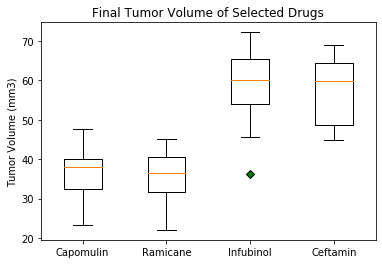

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig7, ax7 = plt.subplots()
ax7.set_title('Final Tumor Volume of Selected Drugs')
ax7.set_ylabel('Tumor Volume (mm3)')
ax7.boxplot(Tlist, flierprops=green_diamond, labels=Dlist)

## Line and Scatter Plots

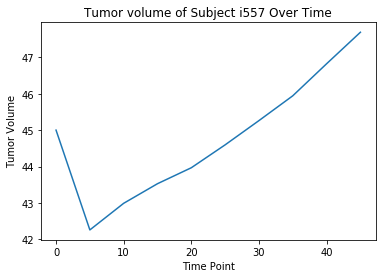

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Cap_df = Clean_df.loc[Clean_df["Drug Regimen"] == "Capomulin"]
#Randomly Select i557
i557_df = Cap_df.loc[Cap_df["Mouse ID"] == "i557"]
#Reset index
i557_df = i557_df.set_index('Mouse ID')
# Plot the tumor volume as a line chart
# Set x & y axis and tick locations
x_axis = [value for value in i557_df["Timepoint"]]
xtick_locations = [value for value in x_axis]
y_axis = [value for value in i557_df["Tumor Volume (mm3)"]]
ytick_locations = [value for value in y_axis]
# Set a Title and labels
plt.title("Tumor volume of Subject i557 Over Time")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
TumAvg, = plt.plot(x_axis, y_axis)

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Cap_df
Weight_df = Cap_df.groupby(["Weight (g)"])
Sctr_df = Weight_df.mean()
Sctr_df

,Age_months,Timepoint,Tumor Volume (mm3),Metastatic Sites
Weight (g),,,,
15,16.000000,22.500000,36.182040,0.000000
17,14.769231,21.538462,37.214133,1.030769
19,7.666667,22.500000,41.182391,0.700000
20,23.000000,22.500000,39.141053,0.600000
21,17.458333,21.666667,42.088700,0.625000
22,15.500000,22.500000,43.288490,0.850000
23,6.478261,20.217391,43.341051,0.521739
24,1.000000,22.500000,44.805810,0.200000
25,14.857143,18.214286,44.062109,0.642857


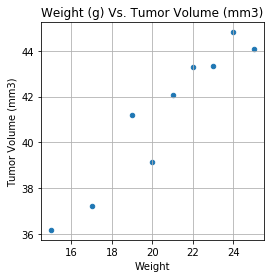

In [23]:
#Set up Scatterplot
Sctr_df["Weight"]=Sctr_df.index.values
Sctr_df.plot(kind="scatter", x="Weight", y="Tumor Volume (mm3)", grid=True, figsize=(4,4), title="Weight (g) Vs. Tumor Volume (mm3)")

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
Weight = Sctr_df["Weight"]
Tumor = Sctr_df["Tumor Volume (mm3)"]
correlation = st.pearsonr(Weight,Tumor)
print(f"The correlation between weight and tumor size is {round(correlation[0],2)}")


The correlation between weight and tumor size is 0.95


The r-squared is: 0.9034966277438606
y = 0.89x + 22.76


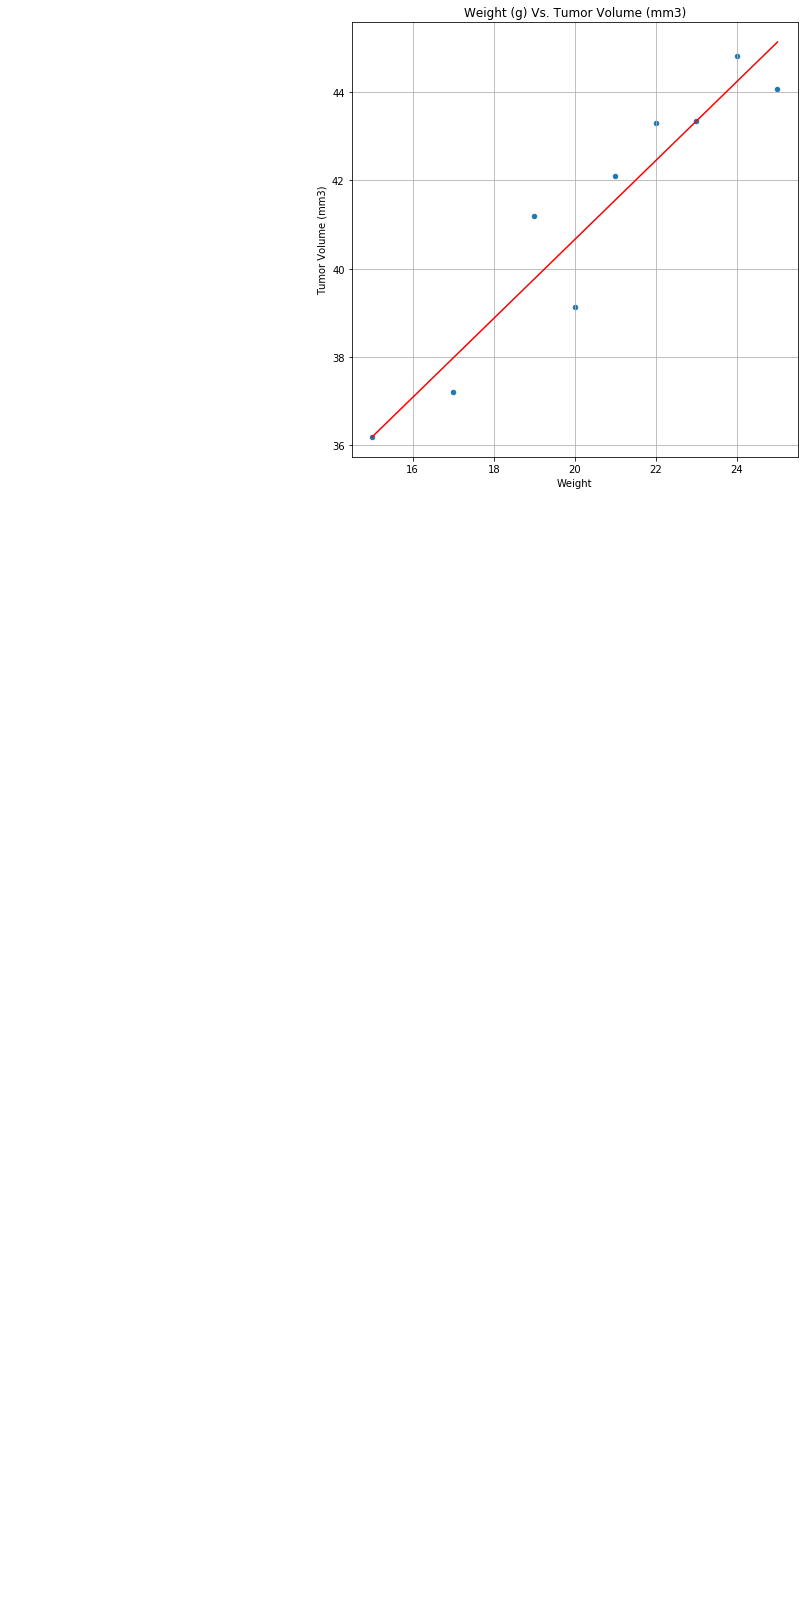

In [25]:
#Calculate linear regression model for mouse weight and average tumor volume for the Capomulin regimen
Sctr_df.plot(kind="scatter", x="Weight", y="Tumor Volume (mm3)", grid=True, figsize=(8,8), title="Weight (g) Vs. Tumor Volume (mm3)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(Weight, Tumor)
regress_values = Weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)